# 6장(부분순서관계와 부울대수)-프로그래밍 실습

## 6-1 부분 순서 관계

### # 부분 순서 관계 확인
- **관계 행렬**로 확인 가능
1. **R의 반사관계 확인**: 주대각 원소가 모두 1?
2. **R의 반대칭관계 확인**: 주대각 원소를 기준으로 마주보는 원소가 서로 다른 값?
3. **R의 추이관계 확인**:  거듭제곱으로 관계행렬이 자신과 같은가?

In [116]:
import numpy as np

# 이항관계 관계행렬 만들기
def makeRelationMatrix(A, B, R):
    datas = []
    for a in A:
        data = []
        for b in B:
            r = (a, b) 
            if r in R: data.append(1)
            else: data.append(0)
        datas.append(data)
        
    print("#관계행렬: ")
    print(np.array(datas))
    return np.array(datas)



A = [1,2,3]  
R = {(1,1),(1,2),(1,3),(2,2),(3,3)}

# 이항관계 관계행렬 만들기
matrix = makeRelationMatrix(A, A, R)

#관계행렬: 
[[1 1 1]
 [0 1 0]
 [0 0 1]]


- 대각성분 추출
1. **R의 반사관계 확인**: 주대각 원소가 모두 1?

In [112]:
# 반사관계 확인: 대각성분이 모두 1인지 체크
def isReflexiveRelation(matrix):
#     print( '주대각원소: ', np.diagonal(matrix) )
    for i in np.diagonal(matrix):
        if i != 1: return False
    return True    


if isReflexiveRelation(matrix): 
    print('반사관계이다')
else: 
    print('반사관계가 아니다')

반사관계이다


2. **R의 반대칭관계 확인**: 주대각 원소를 기준으로 마주보는 원소가 서로 다른 값?

In [105]:
# 반대칭관계 확인: 주대각 원소를 기준으로 마주보는 원소가 서로 다른 값인지 체크
def isAntiSymmetricRelation(matrix):
    r, c = matrix.shape
    for i in range(r):
        for j in range(c):
            if i != j and matrix[i][j] == 1 and matrix[j][i] == 1: 
                return False
    return True    


if isAntiSymmetricRelation(matrix): 
    print('반대칭관계이다')
else: 
    print('반대칭관계가 아니다')

반대칭관계이다


3. **R의 추이관계 확인**:  거듭제곱으로 관계행렬이 자신과 같은가?

In [106]:
# 추이관계  확인
def isTransitiveRelation(matrix):
    r2 = matrix * matrix
    r3 = matrix * matrix * matrix

    if np.array_equal(matrix, r2) and np.array_equal(matrix, r3):
        return True 
    else:
        return False


if isTransitiveRelation(matrix): 
    print('추이관계이다')
else: 
    print('추이관계가 아니다')

추이관계이다


- 부분 순서 관계 확인

In [122]:
# 부분순서관계 확인
def isPartialOrderedRelation(matrix): 
    R_R = isReflexiveRelation(matrix)     # 반사관계
    A_R = isAntiSymmetricRelation(matrix) # 반대칭관계
    T_R = isTransitiveRelation(matrix)    # 추이관계
    
    if R_R and A_R and T_R:
        print('부분순서관계 이다')
        print(f'부분순서관계 여부: {True}')
        return True
    else:
        print('부분순서관계 아니다')
        print(f'부분순서관계 여부: {False}')
        return False
    

In [123]:
A = [1,2,3]  
R = {(1,1),(1,2),(1,3),(2,2),(3,3)}
    
# 이항관계 관계행렬 만들기
matrix = makeRelationMatrix(A, A, R)

# 부분순서관계 확인하기
result = isPartialOrderedRelation(matrix)

#관계행렬: 
[[1 1 1]
 [0 1 0]
 [0 0 1]]
부분순서관계 이다
부분순서관계 여부: True


- 유향그래프 그리기

유향그래프:


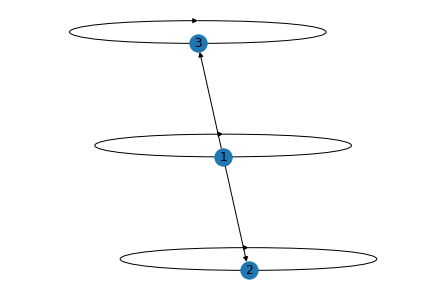

In [113]:
# 유향 그래프 그리기
def makeDirectGraph(A, R):
    import networkx as nx
    import matplotlib.pyplot as plt

    G = nx.DiGraph()  # DirectedGraph(유향 그래프)

    G.add_nodes_from(A) # 점 추가
    G.add_edges_from(R) # 간선 추가

    #그래프 그리기: 실행될 때마다 vertex(node)의 위치가 변경될 수 있다.)
    print('유향그래프:')
    nx.draw(G, with_labels=True)
    plt.show()
    
makeDirectGraph(A, R)  # 유행 그래프 만들기

In [ ]:
# 역행렬
# matrix = matrix.T

### [실습] 사전식 정렬

In [128]:
print('# 문자열 정렬')
value = '1453'
print(sorted(value))   #sorted(value, reverse=True)
print(''.join(sorted(value)))

print('# 알파벳 리스트 정렬')
value = ['abc','ABC','Abc','abcd','acd','a','A','c','C']
value.sort()          #value.reverse()
print(value)

print('# 숫자포함 알파벳 리스트 정렬')
value = ['3abc','1ABC','Abc','2abcd','ac4d','a','A','c','C']
value.sort()          #value.reverse()
print(value)

value = ['help','helping']
value.sort() 
print(value)

value = ['helper','helping']
value.sort() 
print(value)

# 문자열 정렬
['1', '3', '4', '5']
1345
# 알파벳 리스트 정렬
['A', 'ABC', 'Abc', 'C', 'a', 'abc', 'abcd', 'acd', 'c']
# 숫자포함 알파벳 리스트 정렬
['1ABC', '2abcd', '3abc', 'A', 'Abc', 'C', 'a', 'ac4d', 'c']
['help', 'helping']
['helper', 'helping']


#### A = {x, y, z} 멱집합 표현하기

In [115]:
def powerSet(A):
    A_size = len(A)
    A_pow = []
    A.reverse()
    for i in range(2**A_size):
        flag = bin(i)[2:].zfill(A_size)        
        subset = {A[j] for j in range(A_size) if flag[j] == '1'}
        print(f'{flag} - {subset}')        
        A_pow.append(subset)
    return A_pow

A = {'x', 'y', 'z'}
A = list(A)
A.sort()

powerSet = powerSet(A)
print(f"# 멱집합 길이: {len(powerSet)}")

000 - set()
001 - {'x'}
010 - {'y'}
011 - {'x', 'y'}
100 - {'z'}
101 - {'x', 'z'}
110 - {'z', 'y'}
111 - {'x', 'z', 'y'}
# 멱집합 길이: 8


### [예제 6-5] 하세 도형 그리기
A = {1,2,3,4,12}이고, A에 관한 부분순서관계는 아래과 같다.<br>
 a,b∈A에 대해서 a≤b <--> a|b (b는 a로 나누어 떨어진다)<br>
 
1. 부분 순서 관계 확인하기  
2. 하세도형 관계 만들기
3. 하세도형 그리기

#### 1.부분 순서 관계 확인하기

In [129]:
# 관계 순서쌍 만들기
def makeRelationSet(A, B):
    data = []
    for a in A:
        for b in B:
            r = (a, b)
            if (a <= b) and (b%a == 0) :
                data.append(r)
    print('#관계 순서쌍')
    print(data)
    return data


A = {1,2,3,4,12}
print(f'A: {A}')

# 1-1.관계 순서쌍 만들기
R = makeRelationSet(A, A)

# 2-2.이항관계 관계행렬 만들기
matrix = makeRelationMatrix(A, A, R)

# 3.부분순서관계 확인하기
result = isPartialOrderedRelation(matrix)


A: {1, 2, 3, 4, 12}
#관계 순서쌍
[(1, 1), (1, 2), (1, 3), (1, 4), (1, 12), (2, 2), (2, 4), (2, 12), (3, 3), (3, 12), (4, 4), (4, 12), (12, 12)]
#관계행렬: 
[[1 1 1 1 1]
 [0 1 0 1 1]
 [0 0 1 0 1]
 [0 0 0 1 1]
 [0 0 0 0 1]]
부분순서관계 이다
부분순서관계 여부: True


#### 2.하세도형 관계(순서쌍) 만들기

In [227]:
# 하세도형 순서쌍
def makeHasseDiagram(A, R):    
    
    # 추이관계 순서쌍 만들기
    data = []
    for r in R:        
        # 1.순회(self-loop) 제거
        if r[0] == r[1]: continue
        data.append(r)
    print('#반사관계 제거 순서쌍') 
    print(data)        
    
    skip_data = []
    for r in data:        
        for r_ in data: 
            if r[1] == r_[0] and r_[0] < r_[1]:
                t = (r[0], r_[1])
                if (t in data) and (t not in skip_data): 
                    skip_data.append(t)
    
    print('#추이관계 순서쌍') 
    print(skip_data)
    
    
    data = [] 
    for r in R:        
        # 1.순회(self-loop) 제거
        if r[0] == r[1]: continue            
        # 2.추이관계 간선 제거
        if r not in skip_data:   
            data.append(r)    
    
    print('# 하세도형 순서쌍')
    print(data)
    return data

A = {1,2,3,4,12}
R = makeRelationSet(A, A) # 관계 순서쌍 만들기

Result = makeHasseDiagram(A, R)

#관계 순서쌍
[(1, 1), (1, 2), (1, 3), (1, 4), (1, 12), (2, 2), (2, 4), (2, 12), (3, 3), (3, 12), (4, 4), (4, 12), (12, 12)]
#반사관계 제거 순서쌍
[(1, 2), (1, 3), (1, 4), (1, 12), (2, 4), (2, 12), (3, 12), (4, 12)]
#추이관계 순서쌍
[(1, 4), (1, 12), (2, 12)]
# 하세도형 순서쌍
[(1, 2), (1, 3), (2, 4), (3, 12), (4, 12)]


#### 3. 하세도형 그리기 : 무향그래프 그리기

#관계 순서쌍
[(1, 1), (1, 2), (1, 3), (1, 4), (1, 12), (2, 2), (2, 4), (2, 12), (3, 3), (3, 12), (4, 4), (4, 12), (12, 12)]
#반사관계 제거 순서쌍
[(1, 2), (1, 3), (1, 4), (1, 12), (2, 4), (2, 12), (3, 12), (4, 12)]
#추이관계 순서쌍
[(1, 4), (1, 12), (2, 12)]
# 하세도형 순서쌍
[(1, 2), (1, 3), (2, 4), (3, 12), (4, 12)]
#무향그래프:


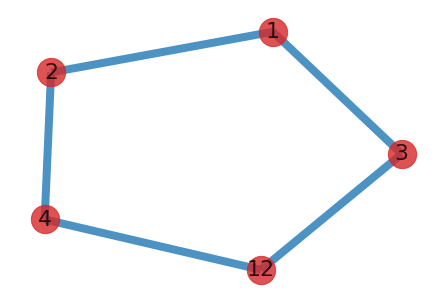

In [228]:
# 무향 그래프 그리기
def makeGraph(A, R):
    import networkx as nx
    import matplotlib.pyplot as plt

    G = nx.Graph()  # UndirectedGraph(무향 그래프)

    G.add_nodes_from(A) # 점 추가
    G.add_edges_from(R) # 간선 추가

    #그래프 그리기: 실행될 때마다 vertex(node)의 위치가 변경될 수 있다.)
    print('#무향그래프:')
    # 방법1: 기본 그래프
#     nx.draw(G, with_labels=True)
    # 방법2: 꾸민 그래프
    nx.draw(G, with_labels=True, 
            node_color="tab:red", node_size=800, # 노드
            edge_color="tab:blue", width=8,      # 에지
            font_size=22, alpha=0.8)

    plt.show()


A = {1,2,3,4,12}
R = makeRelationSet(A, A)       # 1.관계 순서쌍 만들기

Result = makeHasseDiagram(A, R) # 2. 하세도형 관계 만들기

makeGraph(A, Result)            # 3. 하세도형(무향 그래프) 그리기

### [실습] 하세도형 그리기

#반사관계 제거 순서쌍
[(2, 4), (1, 2), (3, 4), (1, 4), (1, 3)]
#추이관계 순서쌍
[(1, 4)]
# 하세도형 순서쌍
[(2, 4), (1, 2), (3, 4), (1, 3)]
#무향그래프:


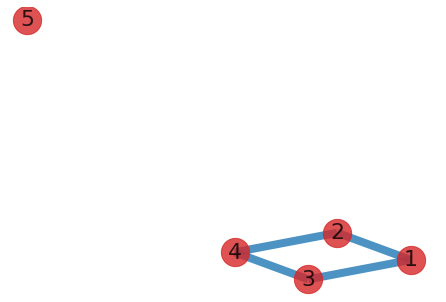

In [230]:
A = {1,2,3,4,5}
R = {(1,1),(1,2),(1,3),(1,4),(2,2),(2,4),(3,3),(3,4),(4,4)}

Result = makeHasseDiagram(A, R)
makeGraph(A, Result)

#반사관계 제거 순서쌍
[('c', 'e'), ('a', 'd'), ('a', 'c'), ('b', 'd'), ('a', 'e'), ('b', 'e'), ('b', 'c'), ('c', 'd')]
#추이관계 순서쌍
[('a', 'e'), ('a', 'd'), ('b', 'e'), ('b', 'd')]
# 하세도형 순서쌍
[('c', 'e'), ('a', 'c'), ('b', 'c'), ('c', 'd')]
#무향그래프:


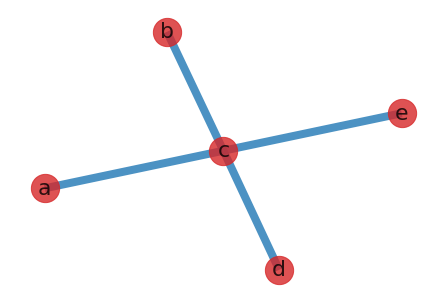

In [231]:
A = {'a','b','c','d','e'}
R = {('a','a'),('a','c'),('a','d'),('a','e'),
     ('b','b'),('b','c'),('b','d'),('b','e'),
     ('c','c'),('c','d'),('c','e'),
     ('d','d'),('e','e')}

Result = makeHasseDiagram(A, R)
makeGraph(A, Result)

### [예제 6-7] 위상 정렬(Topological Sorting) 
- 하세도형의 위상 정렬(Topological Sorting) 

#무향그래프:


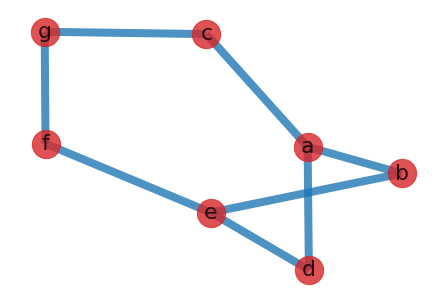

#유향그래프:


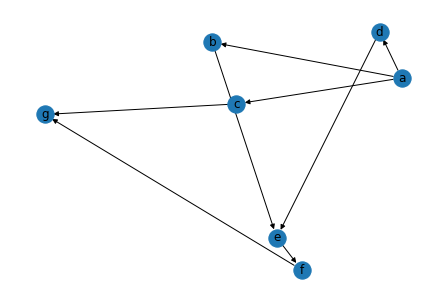

위상정렬: 
['a', 'b', 'd', 'c', 'e', 'f', 'g']


In [232]:
# 위상정렬 
def makeTopologicalSorting(A, R):
    import networkx as nx
    import matplotlib.pyplot as plt

    G = nx.DiGraph()  # UndirectedGraph(유향 그래프)

    G.add_nodes_from(A) # 점 추가
    G.add_edges_from(R) # 간선 추가
    
    print('#유향그래프:')
    nx.draw(G, with_labels=True)
    plt.show()
    
    #그래프 그리기: 실행될 때마다 vertex(node)의 위치가 변경될 수 있다.)
    print('위상정렬: ')
    print(list(nx.topological_sort(G)))

A = {'a','b','c','d','e','f','g'}  
R = {('a','b'),('a','c'),('a','d'),('b','e'),('c','g'),
     ('d','e'),('e','f'),('f','g'),}


makeGraph(A, R)               # 무향 그래프 만들기
makeTopologicalSorting(A, R)  # 위상 정렬 



---------------------

## 6-2 부분 순서 집합의 상한과 하한

### [예제 6-12] 상한, 하한
- 위상 정렬 값을 출력한 후 그 값에서 찾아본다.

#무향그래프:


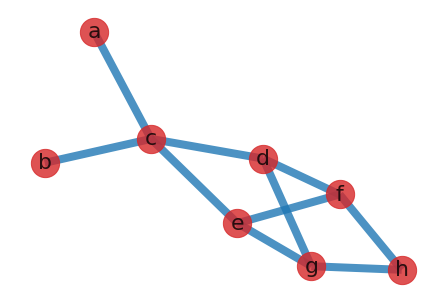

#유향그래프:


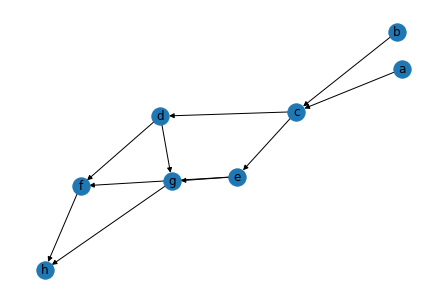

위상정렬: 
['b', 'a', 'c', 'e', 'd', 'f', 'g', 'h']


In [234]:
A = {'a','b','c','d','e','f','g','h'}  
R = {('a','c'),('b','c'),('c','d'),('c','e'),('d','f'),('d','g'),
     ('e','f'),('e','g'),('f','h'),('g','h'),}


makeGraph(A, R)               # 무향 그래프 만들기
makeTopologicalSorting(A, R)  # 위상 정렬 

-------------------------------------

## 6-3 격자

### 약수 구하기

In [243]:
def divisor(N): 
    result = [i for i in range(1,N+1) if N%i == 0]
    
    print(f'{N}의 약수: {result}')
    return result

N = 20
divisor(N)

N = 30
divisor(N)        

20의 약수: [1, 2, 4, 5, 10, 20]
30의 약수: [1, 2, 3, 5, 6, 10, 15, 30]


[1, 2, 3, 5, 6, 10, 15, 30]

### [예제 6-15] 격자

20의 약수: [1, 2, 4, 5, 10, 20]
#관계 순서쌍
[(1, 1), (1, 2), (1, 4), (1, 5), (1, 10), (1, 20), (2, 2), (2, 4), (2, 10), (2, 20), (4, 4), (4, 20), (5, 5), (5, 10), (5, 20), (10, 10), (10, 20), (20, 20)]
#반사관계 제거 순서쌍
[(1, 2), (1, 4), (1, 5), (1, 10), (1, 20), (2, 4), (2, 10), (2, 20), (4, 20), (5, 10), (5, 20), (10, 20)]
#추이관계 순서쌍
[(1, 4), (1, 10), (1, 20), (2, 20), (5, 20)]
# 하세도형 순서쌍
[(1, 2), (1, 5), (2, 4), (2, 10), (4, 20), (5, 10), (10, 20)]
#무향그래프:


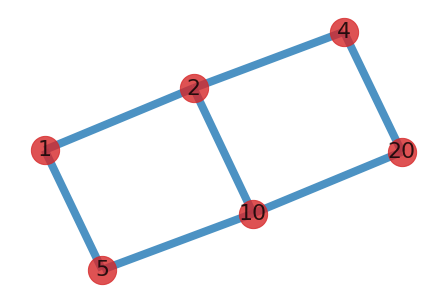

In [247]:
# 관계 순서쌍 만들기
def makeRelationSet(A, B):
    data = []
    for a in A:
        for b in B:
            r = (a, b)
            if (a <= b) and (b%a == 0) :
                data.append(r)
    print('#관계 순서쌍')
    print(data)
    return data


# 약수 만들기
A = divisor(20)

# 하세 도형 그리기
R = makeRelationSet(A, A)       # 1.관계 순서쌍 만들기
Result = makeHasseDiagram(A, R) # 2. 하세도형 관계 만들기
makeGraph(A, Result)            # 3. 하세도형(무향 그래프) 그리기

30의 약수: [1, 2, 3, 5, 6, 10, 15, 30]
#관계 순서쌍
[(1, 1), (1, 2), (1, 3), (1, 5), (1, 6), (1, 10), (1, 15), (1, 30), (2, 2), (2, 6), (2, 10), (2, 30), (3, 3), (3, 6), (3, 15), (3, 30), (5, 5), (5, 10), (5, 15), (5, 30), (6, 6), (6, 30), (10, 10), (10, 30), (15, 15), (15, 30), (30, 30)]
#반사관계 제거 순서쌍
[(1, 2), (1, 3), (1, 5), (1, 6), (1, 10), (1, 15), (1, 30), (2, 6), (2, 10), (2, 30), (3, 6), (3, 15), (3, 30), (5, 10), (5, 15), (5, 30), (6, 30), (10, 30), (15, 30)]
#추이관계 순서쌍
[(1, 6), (1, 10), (1, 30), (1, 15), (2, 30), (3, 30), (5, 30)]
# 하세도형 순서쌍
[(1, 2), (1, 3), (1, 5), (2, 6), (2, 10), (3, 6), (3, 15), (5, 10), (5, 15), (6, 30), (10, 30), (15, 30)]
#무향그래프:


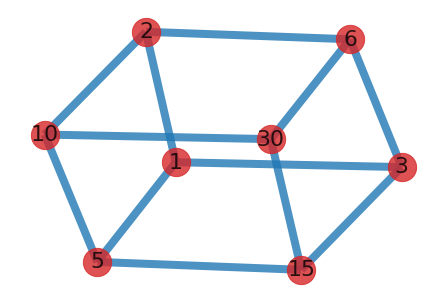

In [248]:
# 약수 만들기
A = divisor(30)

# 하세 도형 그리기
R = makeRelationSet(A, A)       # 1.관계 순서쌍 만들기
Result = makeHasseDiagram(A, R) # 2. 하세도형 관계 만들기
makeGraph(A, Result)            # 3. 하세도형(무향 그래프) 그리기

----------------------------

## 6-4 특별한 형태의 격자

----------------------

## 6-5 부울 대수

#### AND 게이트

In [258]:
#AND 게이트 구현
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = w1*x1 + w2*x2
    if tmp <= theta : # 임계값
        return 0
    elif tmp > theta:
        return 1

R = [(0,0),(0,1),(1,0),(1,1)]
for a, b in R:
    print(f'in : {a, b}')
    print(f'out: {AND(a, b)}')

in : (0, 0)
out: 0
in : (0, 1)
out: 0
in : (1, 0)
out: 0
in : (1, 1)
out: 1


### OR 게이트

In [257]:
#OR 게이트 구현
def OR(x1,x2):
    w1,w2,theta = 0.5,0.5,0.4
    tmp = w1*x1 + w2*x2
    if tmp <= theta : # 임계값
        return 0
    elif tmp > theta:
        return 1

R = [(0,0),(0,1),(1,0),(1,1)]
for a, b in R:
    print(f'in : {a, b}')
    print(f'out: {OR(a, b)}')

in : (0, 0)
out: 0
in : (0, 1)
out: 1
in : (1, 0)
out: 1
in : (1, 1)
out: 1


### Not AND 게이트

In [259]:
#Not AND 게이트 구현
def NAND(x1,x2):
    w1,w2,theta = 0.5,0.5,0.7
    tmp = w1*x1 + w2*x2
    if tmp <= theta : # 임계값
        return 1
    elif tmp > theta:
        return 0

R = [(0,0),(0,1),(1,0),(1,1)]
for a, b in R:
    print(f'in : {a, b}')
    print(f'out: {NAND(a, b)}')

in : (0, 0)
out: 1
in : (0, 1)
out: 1
in : (1, 0)
out: 1
in : (1, 1)
out: 0


### NOT 게이트

In [260]:
def NOT(x):
    return NAND(x, x)

R = [0, 1]
for a in R:
    print(f'in : {a}')
    print(f'out: {NOT(a)}')

in : 0
out: 1
in : 1
out: 0


-----------------------

## 6.6 2-비트 가산기의 설계

### # 비트 연산자 종류
| 기호 | 설명 |
|---|---|
| &   |   비트 AND |
| |   |   비트 OR |
| ~   |   비트 NOT |
| ^   |   비트 XOR |
| $>>$  |   비트 오른쪽 쉬프트 |
| $<<$  |   비트 왼쪽 쉬프트 |

#### # 비트 AND

In [277]:
print(bin(12 & 5))   #2진수 12와 5의 논리곱
print(12 & 5)

0b100
4


#### # 비트 OR

In [278]:
print(bin(12 | 5))  #2진수 12와 5의 논리합
print(12 | 5)

0b1101
13


#### # 비트 NOT

In [279]:
print(bin(~12))   
print(~12)

-0b1101
-13


#### # 비트 XOR

In [280]:
print(bin(12 ^ 5))
print(12 ^ 5)

0b1001
9


#### # 비트 오른쪽 쉬프트

print(bin(12 >> 2))
print(12 >> 2)

#### # 비트 왼쪽 쉬프트

In [281]:
print(bin(12 << 2))
print(12 << 2)

0b110000
48


### # 비트 연산

In [264]:
# 10진수를 2진수로
bin(3) # oct(), hex()

'0b11'

In [263]:
#bin(3)
bin(3)[2:].zfill(8)

'00000011'

In [266]:
# 2진수 계산
0b01+0b11

4

In [275]:
# 2진수 계산
bin(1+3)

'0b100'

In [269]:
# 2진수를 10진수로 변환
int( bin(1+3), 2) 

4

In [273]:
# 10진수를 8진수로 변환
oct(18)

'0o22'

In [274]:
# 8진수를 10진수로 변환
int( oct(18), 8)

18

---------------------------

THE END